In [1]:
%env KERAS_BACKEND=tensorflow

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### CNN要(28,28,1)

In [5]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train[1234].shape ##確認一下

(28, 28, 1)

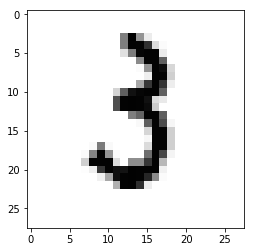

In [7]:
X = x_train[1234]
X = X.reshape(28, 28)
plt.imshow(X,  cmap='Greys')  ##如果要畫圖要改回(28,28)

In [8]:
from keras.utils import np_utils

### one-hot encoding

In [9]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [10]:
y_train[1234] #確認有改好

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### 正規化

In [11]:
x_train = x_train/255
x_test = x_test/255   #因為0~255，所以直接除255就可以了

### 設計CNN，Filter數量要越來越多(一開始數量通常也是2的倍數)，後續數量2倍增加

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten  #Flatten 把矩陣拉平
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adadelta

### Conv裡面要決定 Filter的數量，Filter的大小N*N ，$padding$ 為矩陣外要補 0的個數，$same$ 為輸出的矩陣大小跟原來一樣(28 x 28)，比上課時多增加一層Convolution

In [13]:
model = Sequential()

##第一次 Convolution!
model.add(Conv2D(4, (5, 5), padding='same', input_shape=(28, 28, 1))) 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))  ##Convolution 之後要接 Maxpooling 才算是一層 

##第二次 Convolution!
model.add(Conv2D(8, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

##第三次 Convolution!
model.add(Conv2D(16, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

##第四次 Convolution!
model.add(Conv2D(32, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

### 用Flatten把矩陣拉平，送進去最後一層一般的神經網路

In [14]:
model.add(Flatten())
model.add(Dense(9))
model.add(Activation('relu'))

### 輸出成10維向量

In [15]:
model.add(Dense(10))
model.add(Activation('softmax'))  ##softmax讓輸出結果加起來=1         

### compile，並且更改loss founction為"categorical_crossentropy"，更改optimizer為"Adadelta"

In [16]:
model.compile(loss="categorical_crossentropy",
              optimizer=Adadelta(lr=0.07),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 4)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
__________

In [17]:
model_1=model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 7s 125us/step - loss: 1.3055 - acc: 0.5564
Epoch 2/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3338 - acc: 0.9070
Epoch 3/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2574 - acc: 0.9285
Epoch 4/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.2291 - acc: 0.9363
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.2096 - acc: 0.9420
Epoch 6/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1943 - acc: 0.9462
Epoch 7/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.1814 - acc: 0.9496
Epoch 8/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1710 - acc: 0.9526
Epoch 9/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.1615 - acc: 0.9556
Epoch 10/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1530 - acc: 0.957

### 繪出正確率與epoch的關係圖

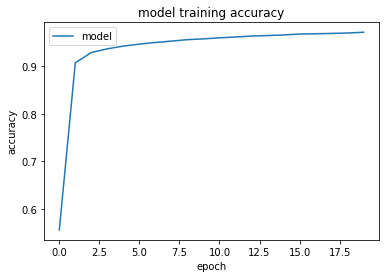

In [18]:
plt.plot(model_1.history['acc'])
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch') #訓練次數
plt.legend(['model'],loc='best')
plt.show()

### 正確率有96.97

In [20]:
score = model.evaluate(x_test, y_test)
print('測試資料的 loss:', score[0])
print('測試資料正確率:', score[1]*100)

10000/10000 [==============================] - 1s 64us/step
測試資料的 loss: 0.10510652063600719
測試資料正確率: 96.97


### 存檔

In [21]:
model_json=model.to_json()
open('first_cnnmodel_mnist.json','w').write(model_json)
model.save_weights('first_cnnmodel_mnist_weights.h5')